# Import

In [1]:
import lab
import lab.plot
import lab.data
import lab.mmath as mmath
import lab.utils as utils
import lab.arr as arr
import lab.linfit as lf
import lab.constants as const
import lab.utils as utils
from lab.unit import unit as u
from uncertainties import ufloat
import matplotlib.pyplot as plt
import numpy as np
print("Import done!")

Import done!


# Read data

In [150]:
U_burn = ufloat(2180, 10) * u("V")
d = 0.2 * u("mm")
l = 5.2 * u("mm")
S=const.pi*d*l
m = 22*1.66e-27 * u("kg")

In [72]:
vah = lab.data.Data("../data/vah.csv")
vah["I"] = vah["I"].set_err(lambda arr: arr * 0.002 + 0.0004 * u("mA"))
vah["U"] = vah["U"].set_err(lambda arr: arr * 0.003 + 0.0004 * u("V"))
vah.head()

,U,I
0,34.30+/-0.10 volt,0.5287+/-0.0015 milliampere
1,33.07+/-0.10 volt,0.7965+/-0.0020 milliampere
2,32.25+/-0.10 volt,1.1050+/-0.0026 milliampere
3,31.70+/-0.10 volt,1.4120+/-0.0032 milliampere
4,31.05+/-0.09 volt,1.713+/-0.004 milliampere


In [73]:
zh5 = lab.data.Data("../data/zh5.csv")
zh5["I"] = zh5["I"].set_err(lambda arr: np.absolute(arr) * 0.002 + 0.0004 * u("microampere"))
zh5["U"] = zh5["U"].set_err(lambda arr: np.absolute(arr) * 0.003 + 0.0004 * u("V"))
zh5.head()

,U,I
0,25.10+/-0.08 volt,113.12+/-0.23 microampere
1,22.05+/-0.07 volt,110.38+/-0.22 microampere
2,19.04+/-0.06 volt,107.66+/-0.22 microampere
3,16.04+/-0.05 volt,104.07+/-0.21 microampere
4,13.05+/-0.04 volt,98.61+/-0.20 microampere


In [74]:
zh3 = lab.data.Data("../data/zh3.csv")
zh3["I"] = zh3["I"].set_err(lambda arr: np.absolute(arr) * 0.002 + 0.0004 * u("microampere"))
zh3["U"] = zh3["U"].set_err(lambda arr: np.absolute(arr) * 0.003 + 0.0004 * u("V"))
zh3.head(5)

,U,I
0,-25.10+/-0.08 volt,-51.37+/-0.10 microampere
1,-22.02+/-0.07 volt,-49.57+/-0.10 microampere
2,-19.05+/-0.06 volt,-47.86+/-0.10 microampere
3,-15.98+/-0.05 volt,-46.06+/-0.09 microampere
4,-12.98+/-0.04 volt,-43.44+/-0.09 microampere


In [75]:
zh15 = lab.data.Data("../data/zh15.csv")
zh15["I"] = zh15["I"].set_err(lambda arr: np.absolute(arr) * 0.002 + 0.0004 * u("microampere"))
zh15["U"] = zh15["U"].set_err(lambda arr: np.absolute(arr) * 0.003 + 0.0004 * u("V"))
zh15.head(5)

,U,I
0,25.10+/-0.08 volt,35.16+/-0.07 microampere
1,21.97+/-0.07 volt,33.86+/-0.07 microampere
2,18.97+/-0.06 volt,32.61+/-0.07 microampere
3,15.99+/-0.05 volt,31.39+/-0.06 microampere
4,13.01+/-0.04 volt,30.06+/-0.06 microampere


# Texify primary data

In [76]:
utils.totex(vah, file="../tex/vah_primary.tex")
for z, i in zip((zh5, zh3, zh15), (5, 3, 1.5)):
    utils.totex(z, file=f"../tex/zh{i}_primary.tex")

# Compute

In [77]:
vah["Up"] = vah["U"] * 10
vah.head()

,U,I,Up
0,34.30+/-0.10 volt,0.5287+/-0.0015 milliampere,343.0+/-1.0 volt
1,33.07+/-0.10 volt,0.7965+/-0.0020 milliampere,330.7+/-1.0 volt
2,32.25+/-0.10 volt,1.1050+/-0.0026 milliampere,322.5+/-1.0 volt
3,31.70+/-0.10 volt,1.4120+/-0.0032 milliampere,317.0+/-1.0 volt
4,31.05+/-0.09 volt,1.713+/-0.004 milliampere,310.5+/-0.9 volt


# Plot

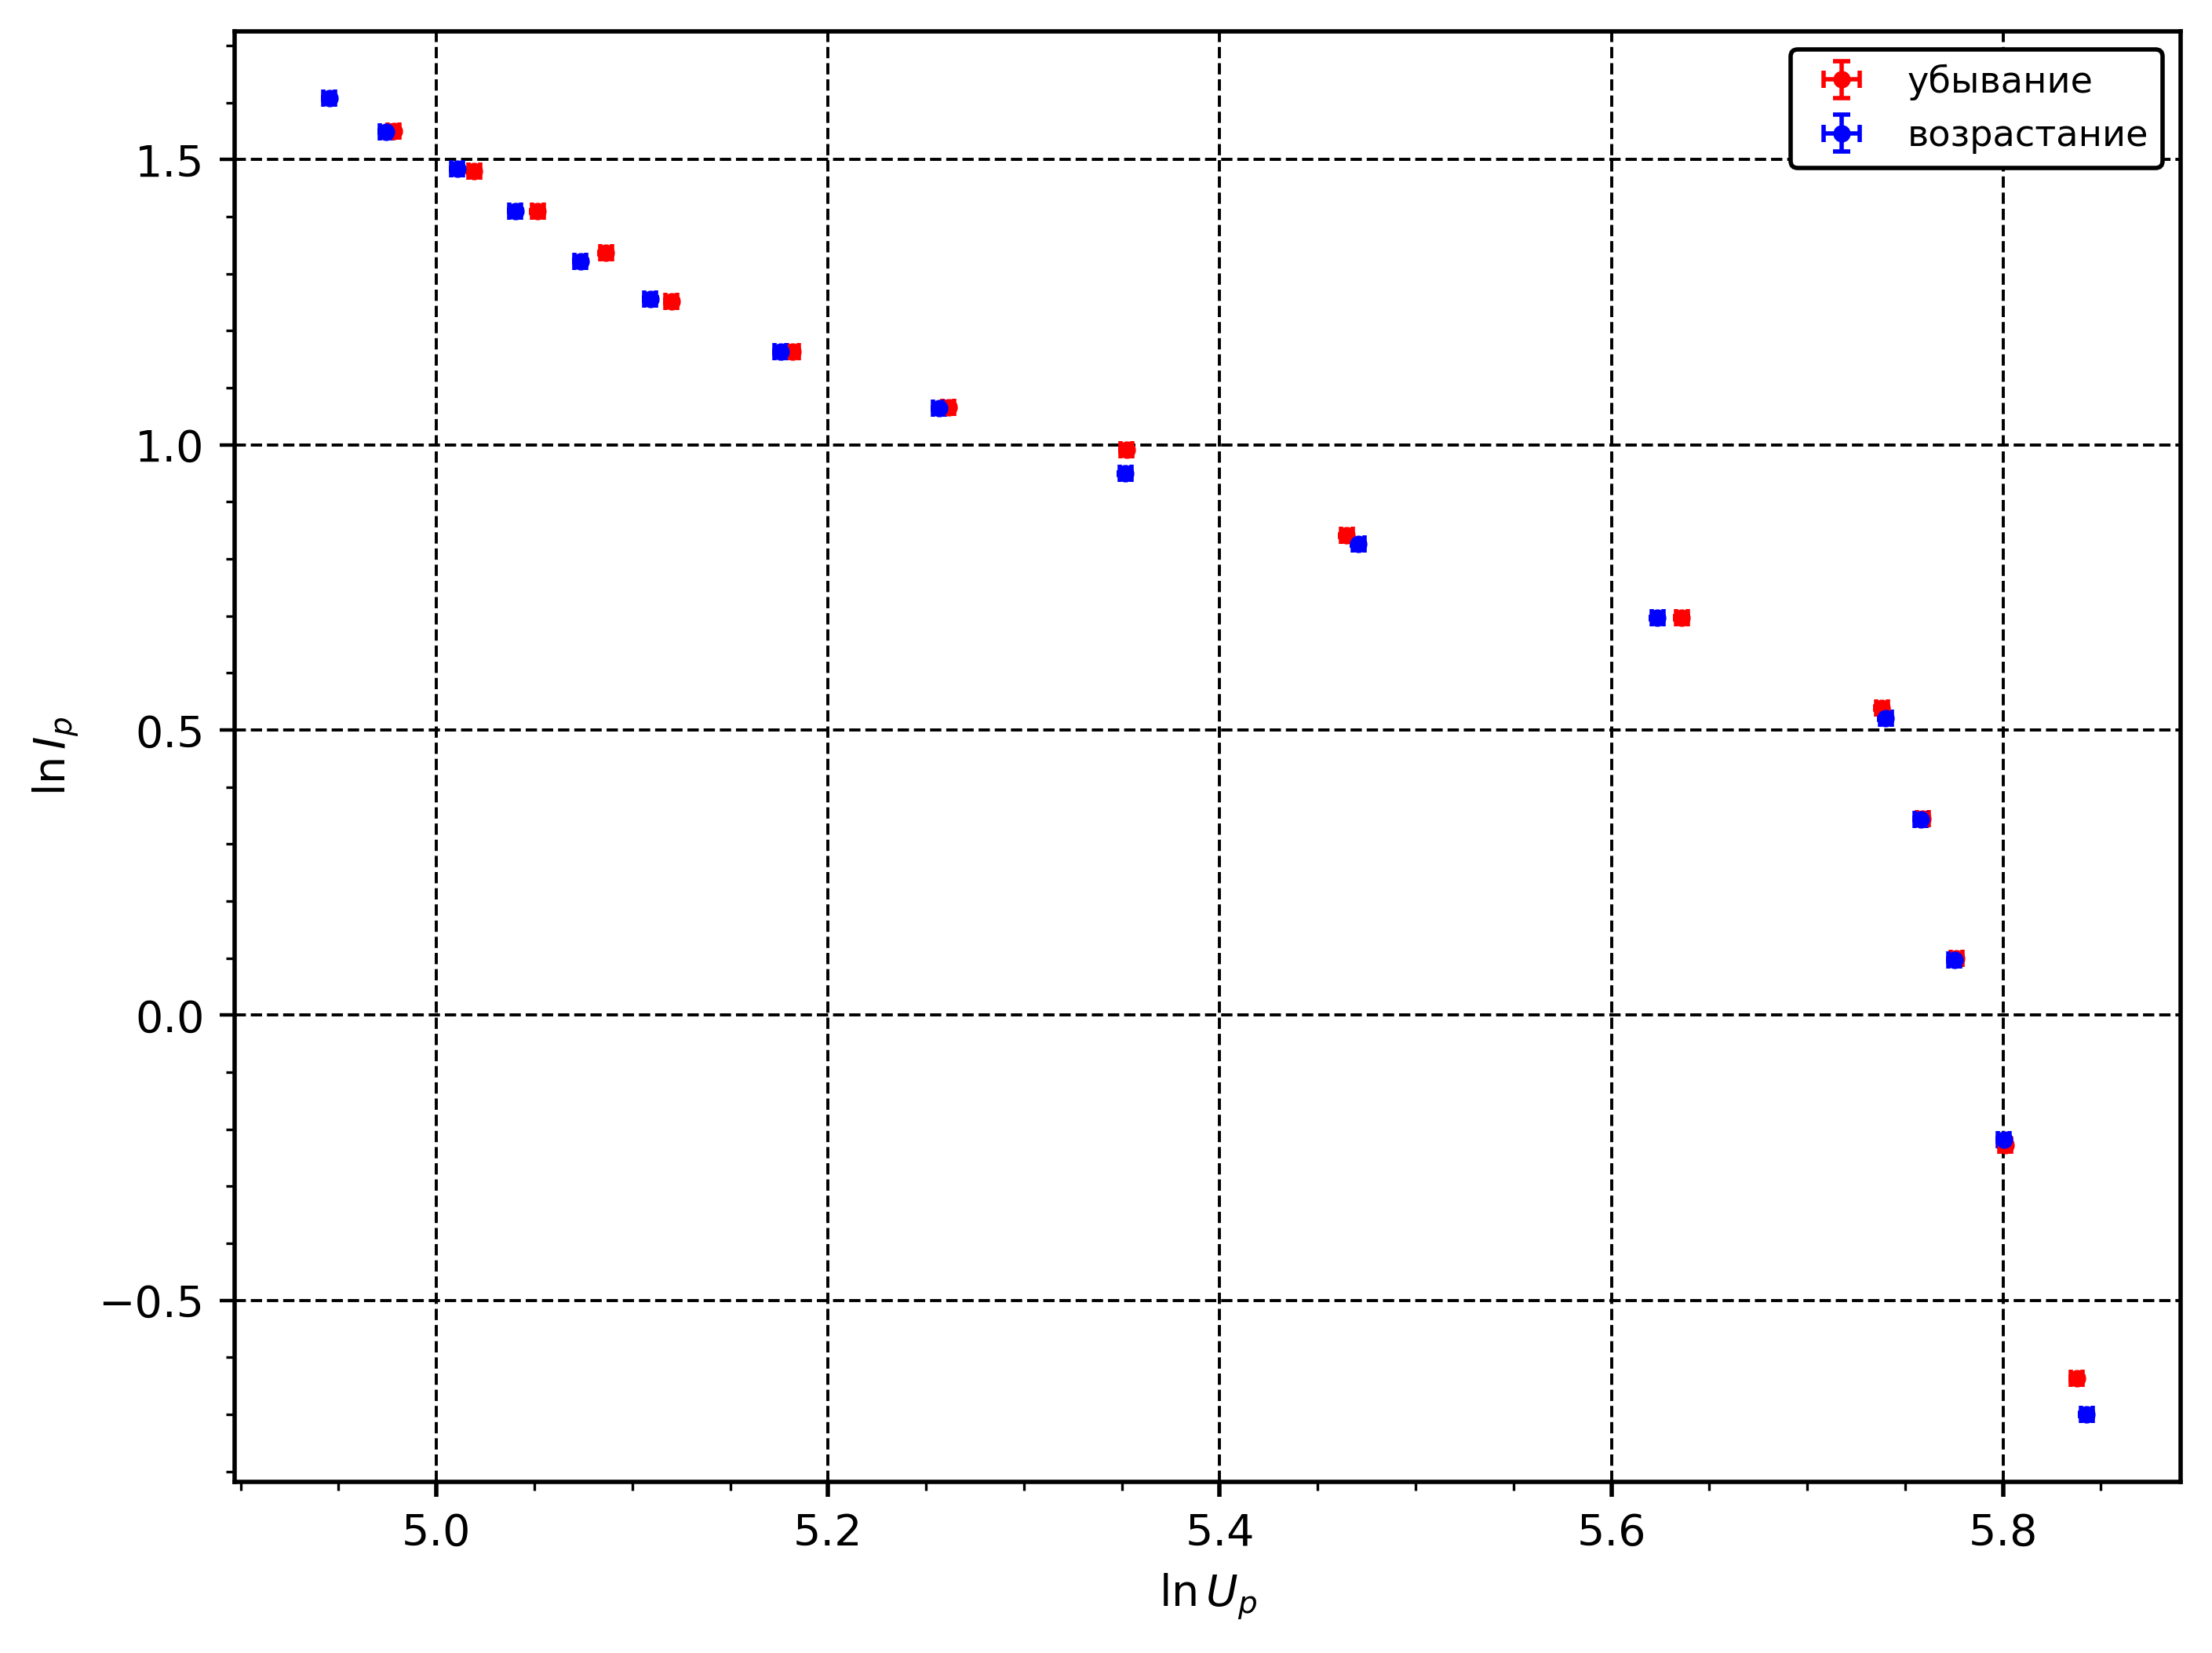

In [78]:
vah_plot = lab.plot.Plot(yl="$\ln I_p$", xl="$\ln U_p$")
vah_plot.plot(mmath.log(arr.Array(vah["Up"][:15]).m), mmath.log(arr.Array(vah["I"][:15]).m), fmt=".", label="убывание", color="red")
vah_plot.plot(mmath.log(arr.Array(vah["Up"][15:]).m), mmath.log(arr.Array(vah["I"][15:]).m), fmt=".", label="возрастание", color="blue")
vah_plot.ax.legend()
vah_plot.save("../img/vah-ln.png")

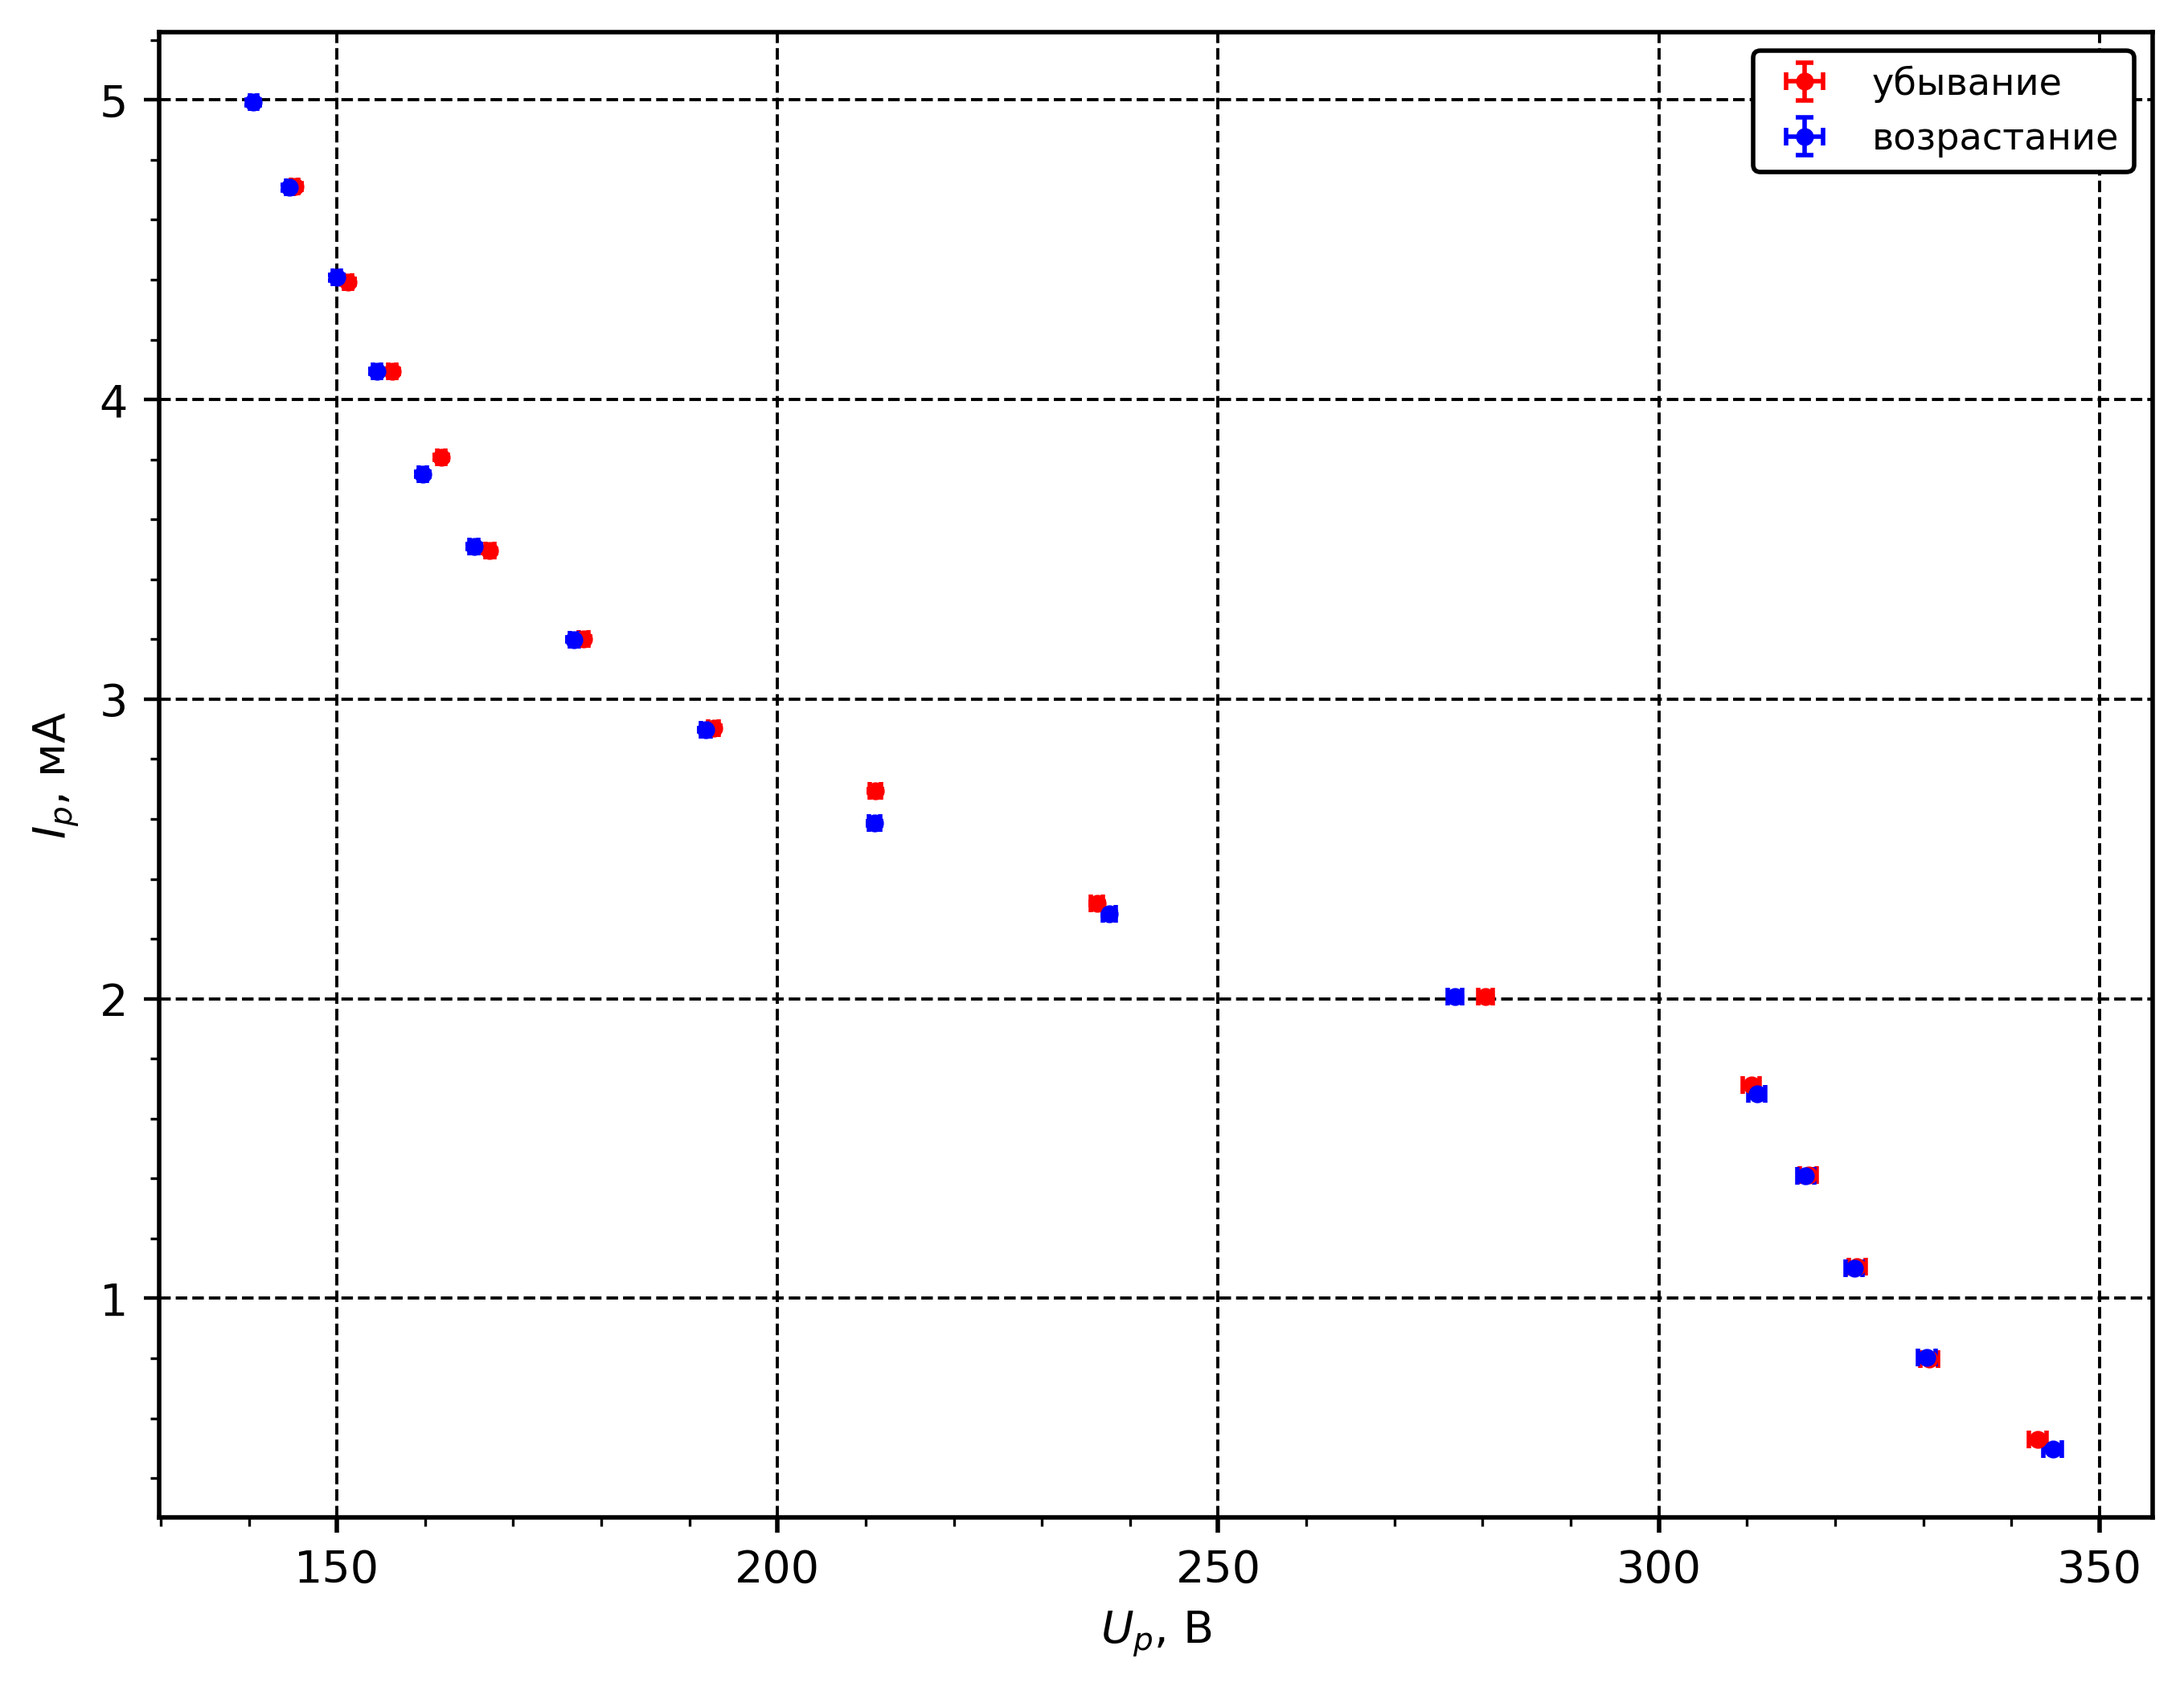

In [79]:
vah_plot = lab.plot.Plot(yl="$I_p$", xl="$U_p$")
vah_plot.plot(vah["Up"][:15], vah["I"][:15], fmt=".", label="убывание", color="red")
vah_plot.plot(vah["Up"][15:], vah["I"][15:], fmt=".", label="возрастание", color="blue")
vah_plot.ax.legend()
vah_plot.save("../img/vah.png")

In [209]:
u_s = arr.Array(np.array([vah["Up"][5], vah["Up"][6], vah["Up"][24], vah["Up"][25]]))
i_s = arr.Array(np.array([vah["I"][5], vah["I"][6], vah["I"][24], vah["I"][25]]))
r, _ = lf.chi2(i_s, u_s)
r.ito(u("ohm"))
utils.totex(r)

\left(-141 \pm 9\right)\cdot 10^{3}\;\text{Ом}


In [95]:
def lol(x, i, d):
    if i > 10:
        return x - d
    return x
zh5["I"] = np.array([lol(zh5["I"][i], i, zh5["I"][11] - zh5["I"][10]) for i in range(len(zh5["I"].arr))])

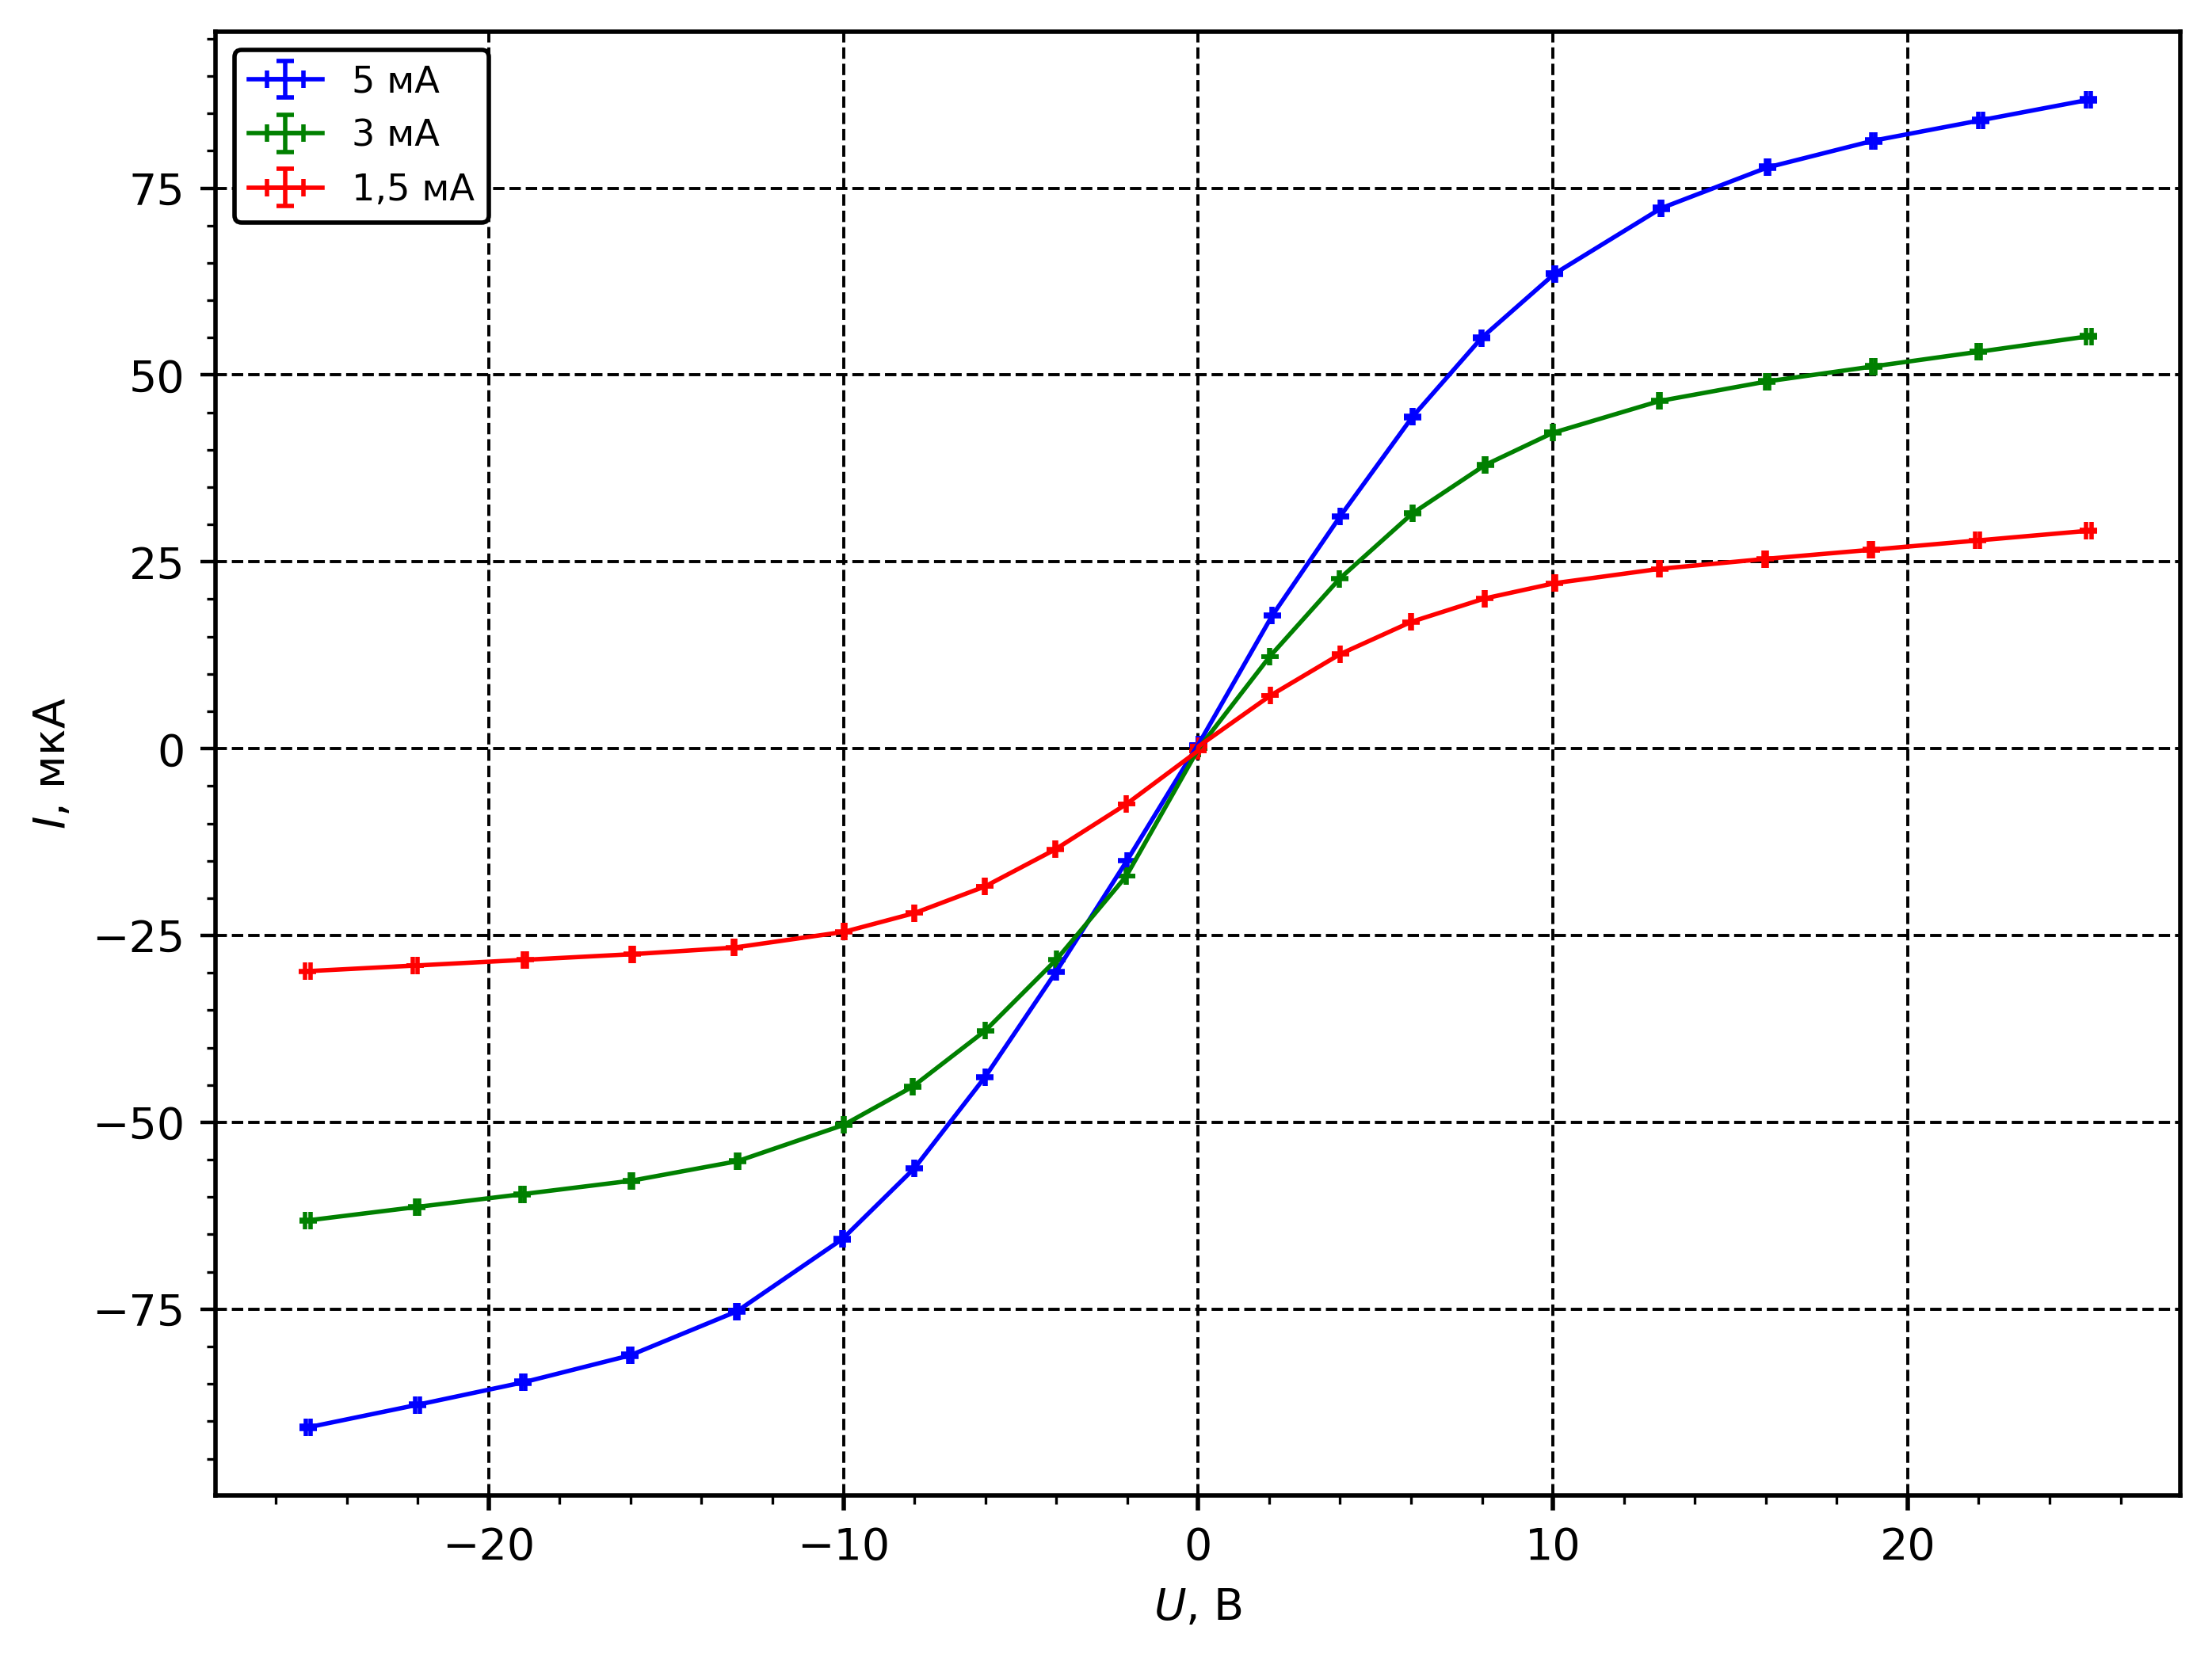

In [96]:
zh_plot = lab.plot.Plot(yl="$I$", xl="$U$")
zh_plot.plot(zh5["U"], zh5["I"] - 26.3 * u("microampere"), label="5 мА")
zh_plot.plot(zh3["U"], zh3["I"] - 11.75 * u("microampere"), label="3 мА")
zh_plot.plot(zh15["U"], zh15["I"] - 6 * u("microampere"), label="1,5 мА")
zh_plot.ax.legend()
zh_plot.save("../img/zh.png")

In [210]:
k_15_0, b_15_0 = lf.chi2(zh15["U"][9:13], zh15["I"][9:13])
utils.totex(k_15_0, b_15_0)
k_3_0, b_3_0 = lf.chi2(zh3["U"][10:13], zh3["I"][10:13])
utils.totex(k_3_0, b_3_0)
k_5_0, b_5_0 = lf.chi2(zh5["U"][9:13], zh5["I"][9:13])
utils.totex(k_5_0, b_5_0)

3{,}63 \pm 0{,}09\;\text{мкА} / \text{В}
5{,}8 \pm 0{,}2\;\text{мкА} / \text{В}
8{,}0 \pm 0{,}2\;\text{мкА} / \text{В}


In [144]:
k_15_l, b_15_l = lf.chi2(zh15["U"][:5], (zh15["I"] - 6 * u("microampere"))[:5])
print("1.5 left:", utils.texify(b_15_l))
k_15_r, b_15_r = lf.chi2(zh15["U"][18:], (zh15["I"] - 6 * u("microampere"))[18:])
print("1.5 right:", utils.texify(b_15_r))

k_3_l, b_3_l = lf.chi2(zh3["U"][:5], (zh3["I"] - 11.75 * u("microampere"))[:5])
print("3 left:", utils.texify(b_3_l))
k_3_r, b_3_r = lf.chi2(zh3["U"][17:], (zh3["I"] - 11.75 * u("microampere"))[17:])
print("3 right:", utils.texify(b_3_r))

k_5_l, b_5_l = lf.chi2(zh5["U"][:5], (zh5["I"] - 26.3 * u("microampere"))[:5])
print("5 left:", utils.texify(b_5_l))
k_5_r, b_5_r = lf.chi2(zh5["U"][18:], (zh5["I"] - 26.3 * u("microampere"))[18:])
print("5 right:", utils.texify(b_5_r))

1.5 left: 18{,}63 \pm 0{,}07\;\text{мкА}
1.5 right: \left(-23543{,}3 \pm 1{,}5\right)\cdot 10^{-3}\;\text{мкА}
3 left: -47{,}1 \pm 0{,}7\;\text{мкА}
3 right: 38{,}47 \pm 0{,}03\;\text{мкА}
5 left: 58 \pm 2\;\text{мкА}
5 right: -64{,}4 \pm 0{,}8\;\text{мкА}


In [145]:
I15 = ufloat(((b_15_l-b_15_r)/2).m.n, (-(b_15_l+b_15_r)/2).m.n) * b_15_l.u
I3 = ufloat(-((b_3_l-b_3_r)/2).m.n, (-(b_3_l+b_3_r)/2).m.n) * b_3_l.u
I5 = ufloat(((b_5_l-b_5_r)/2).m.n, (-(b_5_l+b_5_r)/2).m.n) * b_5_l.u
I15, I3, I5

(21.085996827551206+/-2.4573315886258893 <Unit('microampere')>,
 42.80157598235145+/-4.333808136859485 <Unit('microampere')>,
 61.107808603547625+/-3.3046395771962835 <Unit('microampere')>)

In [146]:
utils.totex(I3)
utils.totex(I5)
utils.totex(I15)

43 \pm 4\;\text{мкА}
61 \pm 3\;\text{мкА}
21 \pm 2\;\text{мкА}


In [147]:
T15 = (0.5 * const.e * I15 / const.kB / k_15_0)
T15.ito(u("kelvin"))
T5 = (0.5 * const.e * I5 / const.kB / k_5_0)
T5.ito(u("kelvin"))
T3 = (0.5 * const.e * I3 / const.kB / k_3_0)
T3.ito(u("kelvin"))

In [148]:
utils.totex(T15)
utils.totex(T5)
utils.totex(T3)

\left(34 \pm 4\right)\cdot 10^{3}\;\text{К}
\left(45 \pm 3\right)\cdot 10^{3}\;\text{К}
\left(43 \pm 5\right)\cdot 10^{3}\;\text{К}


In [159]:
n15 = 2.5*I15/const.e/S/mmath._sqrt(2*const.kB*T15/m)
n15.ito("m**-3")
n5 = 2.5*I5/const.e/S/mmath._sqrt(2*const.kB*T5/m)
n5.ito("m**-3")
n3 = 2.5*I3/const.e/S/mmath._sqrt(2*const.kB*T3/m)
n3.ito("m**-3")

In [160]:
utils.totex(n15)
utils.totex(n5)
utils.totex(n3)

\left(19{,}9 \pm 1{,}2\right)\cdot 10^{15}\;\text{м}^{-3}
\left(50{,}3 \pm 1{,}4\right)\cdot 10^{15}\;\text{м}^{-3}
\left(36 \pm 2\right)\cdot 10^{15}\;\text{м}^{-3}


In [169]:
w15 = 5.6e4 * mmath._sqrt(n15/1e6).m * u("s^-1")
w5 = 5.6e4 * mmath._sqrt(n5/1e6).m * u("s^-1")
w3 = 5.6e4 * mmath._sqrt(n3/1e6).m * u("s^-1")

In [170]:
utils.totex(w15)
utils.totex(w5)
utils.totex(w3)

\left(79 \pm 2\right)\cdot 10^{8}\;\text{с}^{-1}
\left(126 \pm 2\right)\cdot 10^{8}\;\text{с}^{-1}
\left(106 \pm 3\right)\cdot 10^{8}\;\text{с}^{-1}


In [178]:
rde15 = mmath._sqrt(const.kB * T15 / 4 / const.pi / n15 / const.e ** 2).m * u("cm") / 1e4
rde5 = mmath._sqrt(const.kB * T5 / 4 / const.pi / n5 / const.e ** 2).m * u("cm") / 1e4
rde3 = mmath._sqrt(const.kB * T3 / 4 / const.pi / n3 / const.e ** 2).m * u("cm") / 1e4

In [180]:
utils.totex(rde15)
utils.totex(rde5)
utils.totex(rde3)

\left(85 \pm 3\right)\cdot 10^{-5}\;\text{см}
\left(61{,}5 \pm 1{,}2\right)\cdot 10^{-5}\;\text{см}
\left(71 \pm 3\right)\cdot 10^{-5}\;\text{см}


In [185]:
rd15 = mmath._sqrt(const.k * 300 / 4 / const.pi / n15  / const.e**2).m * u("cm") / 1e20
rd5 = mmath._sqrt(const.k * 300 / 4 / const.pi / n5  / const.e**2).m * u("cm") / 1e20
rd3 = mmath._sqrt(const.k * 300 / 4 / const.pi / n3  / const.e**2).m * u("cm") / 1e20

In [186]:
utils.totex(rd15)
utils.totex(rd5)
utils.totex(rd3)

\left(205 \pm 6\right)\cdot 10^{-6}\;\text{см}
\left(129 \pm 2\right)\cdot 10^{-6}\;\text{см}
\left(152 \pm 4\right)\cdot 10^{-6}\;\text{см}


In [189]:
N15 = 4/3*const.pi*rd15**3*n15
N5 = 4/3*const.pi*rd5**3*n5
N3 = 4/3*const.pi*rd3**3*n3

In [190]:
utils.totex(N15)
utils.totex(N5)
utils.totex(N3)

0{,}72 \pm 0{,}02\;
\left(451 \pm 6\right)\cdot 10^{-3}\;
0{,}533 \pm 0{,}014\;


In [203]:
a15 = (n15 / (2*u("mmHg")/const.kB/300/u("kelvin")))
a5 = (n5 / (2*u("mmHg")/const.kB/300/u("kelvin")))
a3 = (n3 / (2*u("mmHg")/const.kB/300/u("kelvin")))

In [204]:
utils.totex(a15)
utils.totex(a5)
utils.totex(a3)

\left(31 \pm 2\right)\cdot 10^{-8}\;
\left(78 \pm 2\right)\cdot 10^{-8}\;
\left(56 \pm 3\right)\cdot 10^{-8}\;


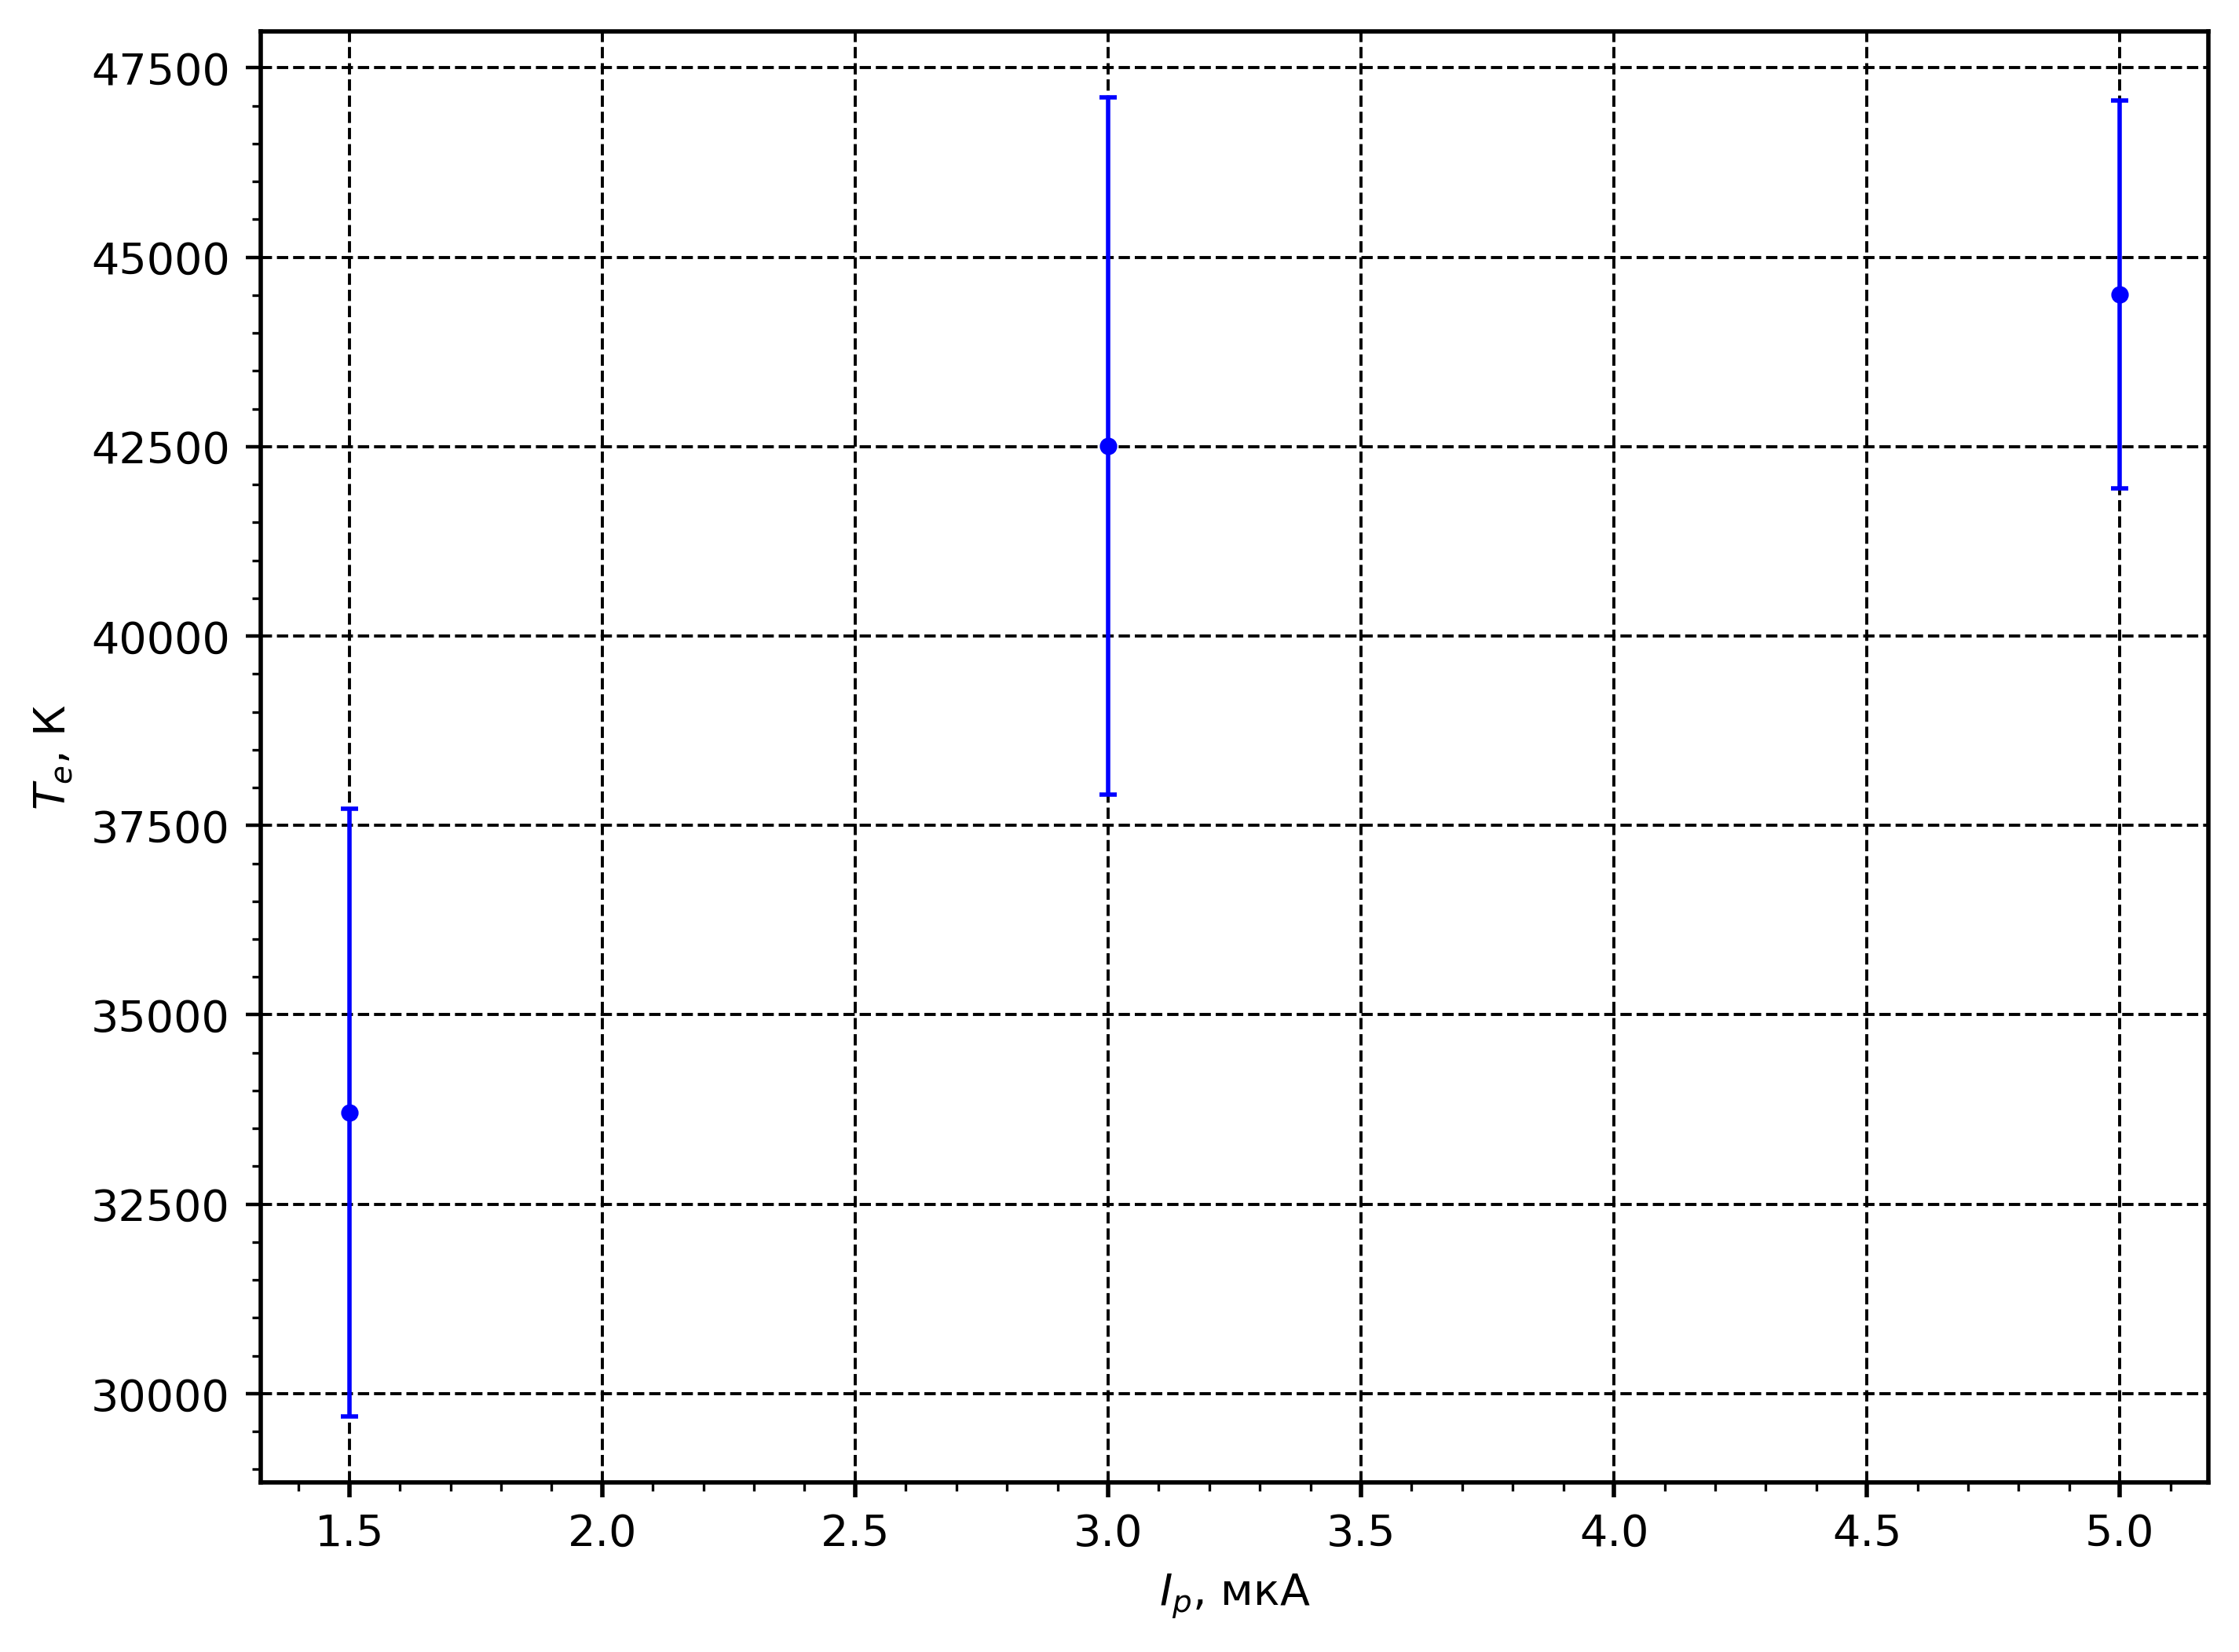

In [206]:
zh_plot = lab.plot.Plot(yl="$T_e$", xl="$I_p$")
zh_plot.plot(arr.Array(np.array([1.5 * u("microampere"), 3 * u("microampere"), 5 * u("microampere")], dtype="object")),
             arr.Array(np.array([T15, T3, T5])), fmt=".")
zh_plot.save("../img/ti.png")

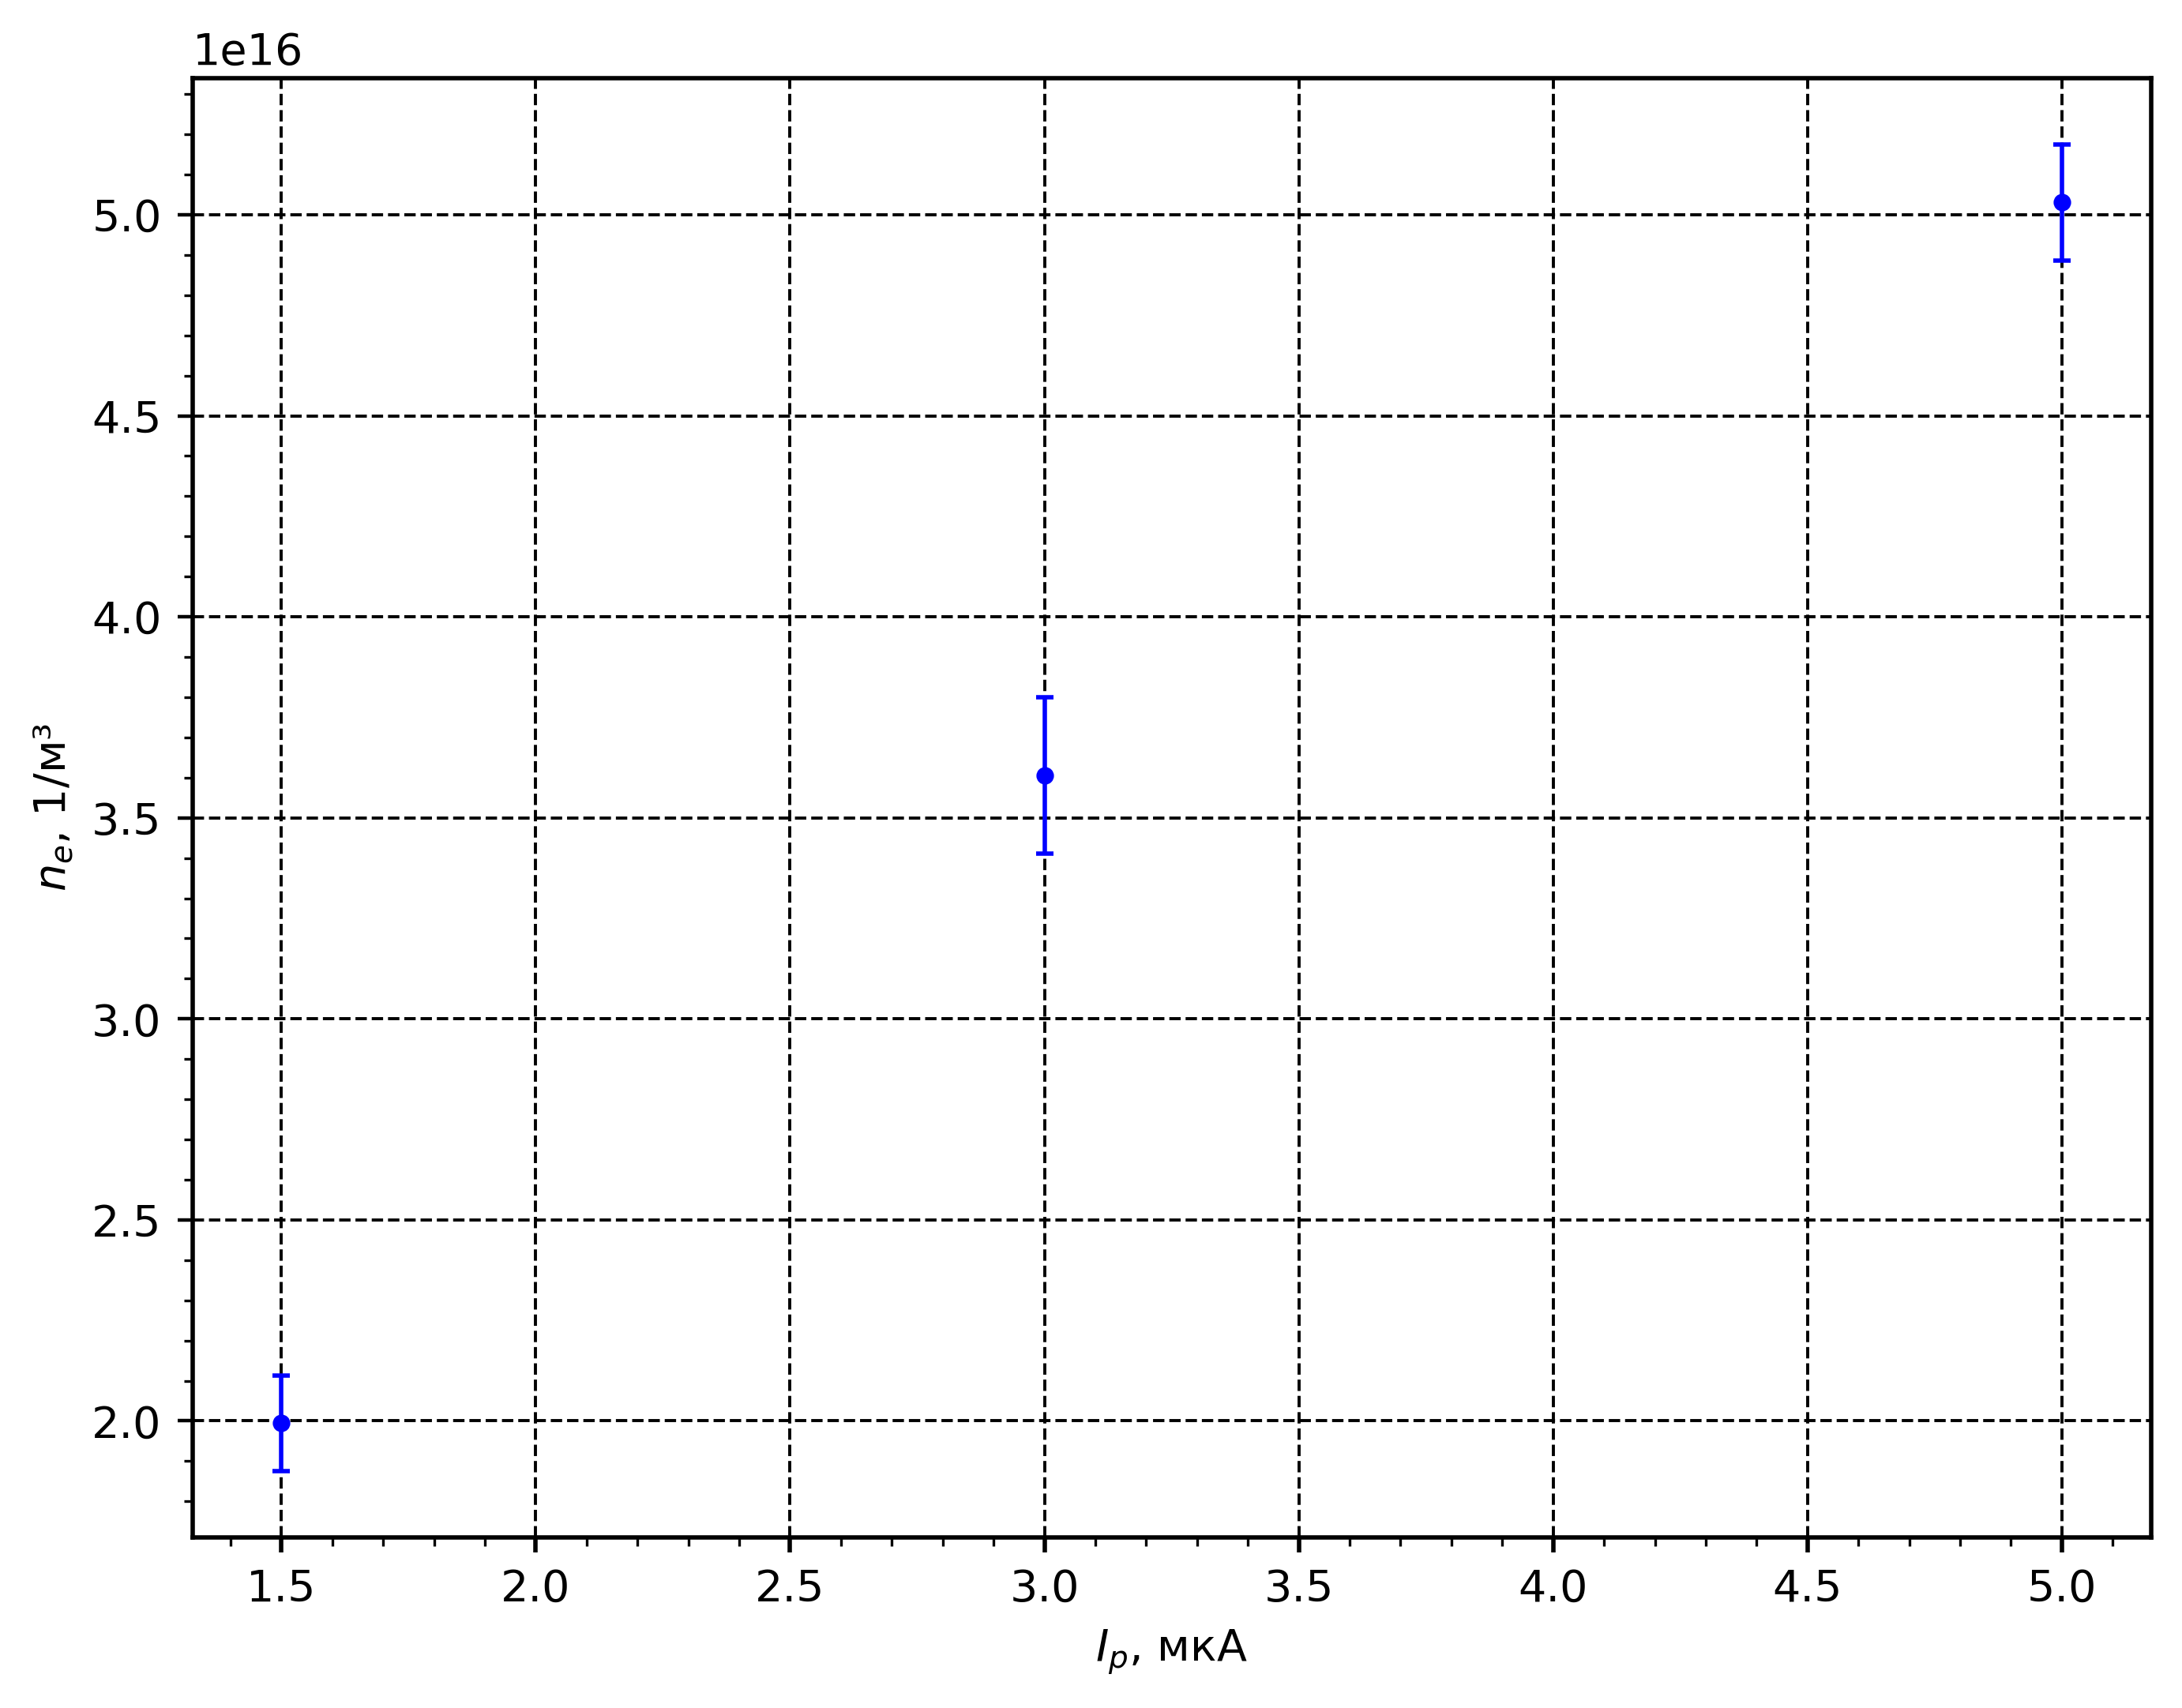

In [207]:
zh_plot = lab.plot.Plot(yl="$n_e$", xl="$I_p$")
zh_plot.plot(arr.Array(np.array([1.5 * u("microampere"), 3 * u("microampere"), 5 * u("microampere")], dtype="object")),
             arr.Array(np.array([n15, n3, n5])), fmt=".")
zh_plot.save("../img/ni.png")

# Plot lines and save

In [23]:
p1.line(k1, b1, color="black")
p1.save("../img/plot1.png")

In [24]:
p2.line(k2, b2, color="black")
p2.save("../img/plot2.png")

# Result

In [25]:
L1 = const.R * data["T"].arr.mean() ** 2 / data["p"].arr.mean() * k1
L2 = -const.R * k2
print(f"L1 = {L1}\nL2 = {L2}")

L1 = (3.86+/-0.10)e+04 joule / mole
L2 = (3.96+/-0.05)e+04 joule / mole


In [26]:
utils.totex(L1)
utils.totex(L2)

\left(3{,}86\pm0{,}10\right)\cdot 10^{4}\;\text{Дж} / \text{моль}
\left(3{,}96\pm0{,}05\right)\cdot 10^{4}\;\text{Дж} / \text{моль}


# Texify intermediate data

In [27]:
utils.totex(data, file="../tex/table2.tex", columns={
    "T": "T",
    "h1": "h_1",
    "h2": "h_2",
    "p": "P",
    "1/T": "T^{-1}",
    "lnp": "\ln P",
})